# IT Skills for linguists 2
## UAM, Faculty of English, 2BA
### Topic: *Internet data*
#### Poznań, 13.03.2023
#### Teacher: mgr inż. Michał Junczyk


# 8. Internet data

- Language researches often must obtain and handle data from the web
  - e.g. retrieve webpages or extract text and other information.
- This class covers:
  - basic structure of HTML documents methods for extracting information
  - dealing with differenet text encodings.
  - methods for parallelizing code to run web interactions more efficiently
  - program for a simple webcrawler:
    - program starts from a single webpage
    - recursively follows and retrieves links with particular properties

## 8.1 Retrieving Webpages

- Extremely simple thanks to urllib.request module
- Includes a function, urlopen(), which creates a stream that can be read from.


In [ ]:
import urllib.request
#a url to read from
link = "http://www.u.arizona.edu/~hammond/"
#open a link to the url
f = urllib.request.urlopen(link)
#read the page
myfile = f.read()
#print the decoded page
print(myfile.decode('UTF-8'))

## 8.2 HTML formatting

- Web browsers retrieves data from other computers in a variety of formats.
  - pictures,
  - music
  - movies
  - pdf documents, etc.
- Most commonly web pages are text documents formatted using HTML or *hypertext markup language*.

### Raw HTML

### What browsers display (interpreted HTML)

<!DOCTYPE html>
<html>
    <head>
        <title>a title</title>
    </head>
    <body>
        <h1>a heading</h1>
        <p>content</p>
    </body>
</html>

### HTML structure

- HTML is built around tags
- Tags are instructions to web browser that are marked with angled brackets.
- For example:
  - \<p\> marks a paragraph,
  - \</em\> marks the end of a span of emphasized text, etc.

- 2 types of tags:
  - paired e.g. \<head\> and \</head\>
    - opening tag - angled brackets
    - closing tag - angled brackets and a slash after the left bracket
  - standalone e.g. \<!DOCTYPE html\> 
    (declaration that the document is written in HTML (version 5))


- Tags can also have attributes
- Attributes are additional information specified in the tag.
  - e.g. "href" attribute in hyperlink tag <br>
  - The opening tag has an attribute **href** for a web address<br>
    \<a href="http://www.google.com" \> Go to Google.\</a\>


- The general structure of a page marked up with HTML is underdetermined 
  - various versions of HTML in use 
  - browser-specific tags special interpretation of tags in general use
- Usually HTML document can begin with a document declaration
- Remaining document with the tags \<html>…\</html>.
- Further parts: the head and the body
  - The head includes metadata about the document, the title, javascript code, color etc.
  - The body includes the text with markup to structure the text or format spans of text.

### Elements of body used for formatting
- Headings - Section headings at different levels, \<h1>, \<h2>, \<h3>, etc. 
  - occur in pairs: \<h1>…\</h1>.
- Paragraphs - Marked with \<p>…\</p>. 
  - The closing tag is not required. 
  - Line breaks marked with the unpaired tag \<br>.
- Lists:
  - ordered lists \<ol>…\</ol> and
  - unordered lists \<ul>…\</ul>.\
  - List items are marked with \<li>…\</li>.
  - Pairing optional
- Formatting
  - italic \<i>…\</i> 
  - boldface \<b>…\</b>
  - strong \<strong>…\</strong>
  - emphatic \<em>…\</em>

### Raw HTML file

### Rendered html

<!DOCTYPE html>
<html>
<head>
<title>Here's a title</title>
</head>
<body>
<h1>Some examples</h1>
<h2>Text chunks</h2>
<p>This is a paragraph.</p>
<p>This is another paragraph.<br>
with a break in the middle.</p>
<h2>Lists and formatting</h2>
<ol>
<li>Some <strong>strong</strong> text.</li>
<li>Some <b>bold</b> text.</li>
<li>Some <em>emphasized</em> text.</li>
<li>Some <i>italic</i> text.</li>
</ol>
</body>
</html>

## 8.3 Parsing HTML

- Data collected from the web often must be cleaned from markup language tags
- Cleaning method depends on the goals
  - Case 1 - only words will be analyzed - all tags can be stripped
  - Case 2 - formatting or discourse or syntactic breaks will be analyzed - parsing needed
    - Tags are useful to determine the difference between line breaks sentence breaks, and paragraph breaks.

In [ ]:
f = open('hammond.html','r')
t = f.read()
f.close()
print(t)

### Removing all tags


In [ ]:
import re
#open local page
f = open('hammond.html','r')
t = f.read()
#read it all in
f.close()
#close file stream
#eliminate header up to body of page
t = re.sub('^.*<body>','',t,flags=re.I|re.S)
#remove all tags
t = re.sub('<[^>]*>',' ',t,flags=re.I|re.S)
print(t)

### Removing left-over HTML tags
- string --> scattered about the page (right side of an HTML comment)

In [ ]:
import re
#open local webpage
f = open('hammond.html','r')
t = f.read()
#read it all in
f.close()
#close file stream
#get rid of header
t = re.sub('^.*<body>','',t,flags=re.I|re.S)
#get rid of (at least some) html comments
t = re.sub(
'<!--[^-]*-->',' ',t,flags=re.I|re.S
)
#get rid of at least some tags
t = re.sub('<[^>]*>',' ',t,flags=re.I|re.S)
print(t)

### Using Beautiful Soup module for HTML parsing
- Parsing HTML manually is hard. There's easier way to do it.
- Beautiful soup module: https://www.crummy.com/software/BeautifulSoup/
- To install run:
  - pip install beautifulsoup4


In [ ]:
#! pip install beautifulsoup4

In [14]:
#import for reading urls
import urllib.request
#import for parsing html
from bs4 import BeautifulSoup

#non-local page this time
link = "http://www.u.arizona.edu/~hammond/"
#connect to that page
f = urllib.request.urlopen(link)
myfile = f.read()
#read it all in
#build a document model
soup = BeautifulSoup(myfile,'html.parser')
#print(myfile)
#print page verbatim
#print(soup.prettify()) #pretty-print html
#print(soup.get_text()) #extract the text
#got through all the hyperlinks...
for link in soup.find_all('a'):
    #...and print them
    print(link.get('href'))

http://linguistics.arizona.edu/
http://www.arizona.edu/
https://linguistics.arizona.edu/master-science-human-language-technology-hlt
https://cogsci.arizona.edu
https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
http://slat.arizona.edu
http://www.u.arizona.edu/~hammond/spamho.html
http://www.u.arizona.edu/~hammond/cvanon.pdf
lazy.pdf
lazy.lhs
flbi1.02.tar.gz
http://dingo.sbs.arizona.edu/~hammond/lingml/lingml.html
http://dingo.sbs.arizona.edu/~hammond/georgia/gindex.html
http://roa.rutgers.edu/
http://www.u.arizona.edu/~hammond/mhlocweb
http://www.u.arizona.edu/~hammond/sylpars
http://roa.rutgers.edu/
gho.pdf
sapporo.pdf
talkLSA12.pdf
bangor.pdf
talk.pdf
http://dingo.sbs.arizona.edu/~hammond/Rwkshp11/
http://dingo.sbs.arizona.edu/~hammond/Rwkshp/
http://dingo.sbs.arizona.edu/~hammond/andy13/
taiwan/taiwan.html
taiwan/taitalk.pdf
http://dingo.sbs.arizona.edu/~hammond/disting.pdf
http://dingo.sbs.arizona.edu/~hammond/otslat.pdf
http://dingo.s

## 8.4 Parallelism


- Working with web data relies on the speed of:
  - the network between client and server
  - server computation speed
- Working with multiple web pages can be slow!


In [19]:
#web10.py

#import for timing your code
import time
#import for reading webpages
from urllib.request import urlopen

def mytime():   #return time in milliseconds
	return round(time.time() * 1000)

def myget(url): #read url and time that read
	start = mytime()
	data = urlopen(url,timeout=5).read()[:50]
	result = {"url": url, "data": data}
	now = str(mytime() - start)
	print(url + ": " + now + "ms")
	return result

#a random list of urls
urls = ['http://www.google.com/',
'http://www.yahoo.com/',
'https://news.google.com/news',
'https://tartarus.org/martin/PorterStemmer/',
'https://en.wikipedia.org/wiki/Main_Page',
'http://www.u.arizona.edu']

#start overall timing
start = mytime()
results = []    #list to collect results
#go through urls 1 by 1
for i in range(len(urls)):
	#get url and text read
	result = myget(urls[i])
	#append those to results
	results.append(result)
#get end time
now = str(mytime() - start)
#print overall time
print("Total = " + now + " ms\n")



http://www.google.com/: 245ms
http://www.yahoo.com/: 921ms
https://news.google.com/news: 501ms
https://tartarus.org/martin/PorterStemmer/: 175ms
https://en.wikipedia.org/wiki/Main_Page: 285ms
http://www.u.arizona.edu: 3698ms
Total = 5828 ms



- **urllib.request** module is used to get access to the **urlopen()** function.
- The **time()** function from the time module returns the current time
  - used determine how long code runs.
- 2 user defined functions
  - mytime() gets the current time in milliseconds
  - myget() prints how long it took to read file


- list of urls is run through myget()
- total run time is roughly the sum of the time it takes to retrieve each page. 


### Why use parallelism?
- Efficient system use computer to do something else while waiting for the other computer to respond.
- Modern computers have a multiprocessors, so can do more than one thing at once.


In [23]:
#web11.py

import time      #for timing info
#to read webpages
from urllib.request import urlopen
#to do more than one thing at once
from multiprocessing import Pool

#current time in milliseconds
def mytime():
	return round(time.time() * 1000)

def myget(url):  #50 characters of a webpage
	start = mytime()
	data = urlopen(url,timeout=5).read()[:50]
	result = {"url": url, "data": data}
	now = str(mytime() - start)
	print(url + ": " + now + "ms")
	return result

#some random urls
urls = ['http://www.google.com/',
'http://www.yahoo.com/',
'https://news.google.com/news',
'https://tartarus.org/martin/PorterStemmer/',
'https://en.wikipedia.org/wiki/Main_Page',
'http://www.u.arizona.edu']

#print urls in order accessed
for i in range(len(urls)):
	print(i+1,': ',urls[i],sep='')
print()

mypool = Pool()  #multiple processes
start = mytime() #start the clock
#separate process for each url
results = mypool.map(myget, urls)
#print total elapsed
now = str(mytime() - start)
print("Total = " + now + " ms\n")

1: http://www.google.com/
2: http://www.yahoo.com/
3: https://news.google.com/news
4: https://tartarus.org/martin/PorterStemmer/
5: https://en.wikipedia.org/wiki/Main_Page
6: http://www.u.arizona.edu

https://tartarus.org/martin/PorterStemmer/: 217ms
http://www.google.com/: 414ms
https://en.wikipedia.org/wiki/Main_Page: 315ms
http://www.yahoo.com/: 923ms
https://news.google.com/news: 2580ms
http://www.u.arizona.edu: 3552ms
Total = 4003 ms



- Imported modules:
  - time - to measure code runs
  - urllib.request - to open and read web pages.
  - multiprocessing - to process more than one thing at a time.
  
- Same urls and functions mytime() and myget() as in web10.py.


- First a Pool is created to monitor processing happening at once.
- Then the method "mypool.map()" applies myget() to all the urls
- Each of these applications of myget() proceeds in parallel.
  - If any page is slow to load, the other requests proceed unaffected.
- Program prints out:
  - Finish times of each myget() function for one url
  - The total run time for all urls


- Notes
  - Total code run time varies
  - Total code run is not the sum of the length of the individual calls to myget().
  - Total run time is roughly equivalent to the slowest call to myget().
  - Finish order of myget() runs is not the same as in the initial URLs list.
  - Finish order is based on actual completion time of each run. 

## 8.5 Unicode and Text Encoding

- Linguists are often concerned with textual representations of language.
- As we know, computers don’t process text directly.
- For computers, text is represented internally as numbers.
- It's useful to know:
  - how characters are represented internally
  - what are the major character encodings you may run across
  - methods for reading, writing, and converting different encodings.
  - methods for deducing the encoding of some document or resource.

### Binary encoding

- computer represents characters internally as numbers
- numbers are represented as binary, or base-2, numbers
- letters can be represented as subsequent numbers

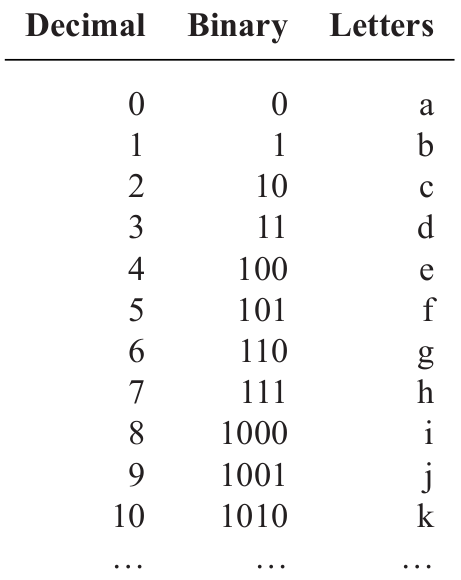

- problem with writing numbers consisting of multiple digits

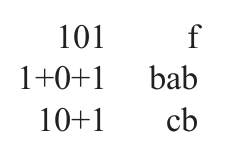

- solution - padding (adding leading zeros)
- now each encoded representation has the same length <br>
- removed ambiguity for combinations - fixed length of each symbol 
  - 0101 - f
  - 0001 0010 0001 - bcb
  - 0010 0001 - cb

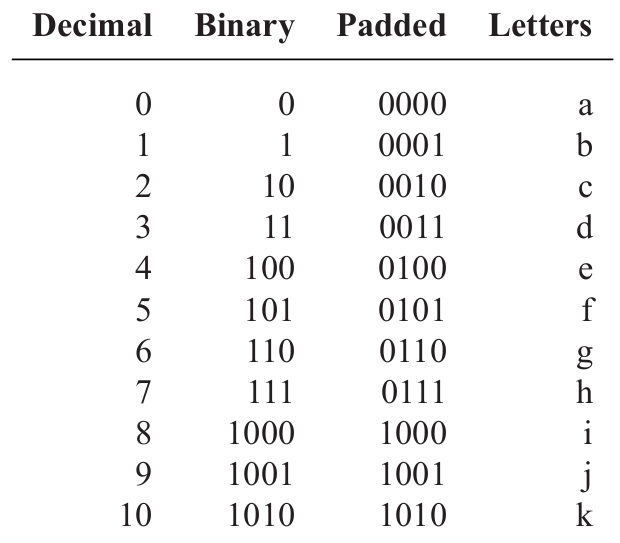

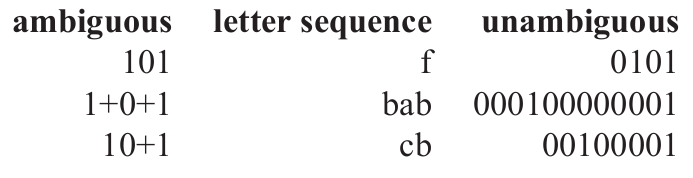

#### ASCII encoding

- ASCII - one of the first approaches to character encoding
- It used 7 bits to encode each letter (plus *parity* bit)
- An **8-bit unit** is referred to as a **byte**.
- Seven binary bits to encode letters - only 128 distinct characters possible
  - Suffice languages like English,
  - Doesn't accommodate characters of all the languages of the world
  - Doesn’t accommodate documents with multiple character sets

#### Unicode encoding
- Various approaches adopted to deal with character sets beyond ASCII (wild west!)
- Eventually, the Unicode standard was proposed
  - pros - a uniform numerical value for every character in virtually every language
  - cons - to cover million distinct characters more than 8 bits (1 byte) is needed
- UTF-16 (Unicode Transformation Format) encodes (almost) every character with 16 bits (2 bytes).
- UTF-8 encodes each character with a variable number of bytes: 1 to 4
  - ASCII characters encoding is the same in ASCII and UTF-8

## 8.6 Bytes and Strings

- Python is natively UTF-8
- File IO and the interactive environment handle UTF-8 characters directly


In [29]:
x = 'русский язык'
y = '中文'

In [28]:
len(x)

12

In [27]:
len(y)

2

In [30]:
x = 'русский язык'
y = '中文'
print(x,': ',len(x),sep='')
print(y,': ',len(y),sep='')

русский язык: 12
中文: 2


In [31]:
f = open('enc/russian.txt','r')
r = f.read()
f.close()
print('Some Russian:',r,end='')

Some Russian: русский язык


In [32]:
f = open('enc/chinese.txt','r')
c = f.read()
f.close()
print('Some Chinese:',c,end='')

Some Chinese: 中文


- Russian and Chinese was encoded in UTF8 files
- Reading text files encoded in different format (e.g.big5) causes error

In [34]:
f = open('enc/cb5.txt','r')
f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte

In [35]:
# Same issue with reading Russian from a file encoded in Windows-1251 encoding:
f = open('enc/r1251.txt','r')
f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 0: invalid continuation byte

- To read files in other encodings:
  - read data as the raw bytes
  - explicitly convert the encodings using the bytes method decode().

In [36]:
#open a file to read bytes
f = open('enc/cb5.txt','rb')
c = f.read()
#read the bytes
#convert from big5 to utf8 characters
c = c.decode('big5')
print('Chinese:',c)
#print characters
#open a file to read bytes
f = open('enc/r1251.txt','rb')
r = f.read()
#read the bytes
#convdert from windows-1251 to utf8
r = r.decode('1251')
print('Russian:',r)
#print characters

Chinese: 中文
Russian: русский язык


- open() function with the argument 'rb' reads raw bytes
- converting from raw to the relevant encodings with the decode() method

### What Is the Encoding?

- Challenge - you do not know what is the encoding of some document.
- Option 1
  - We may use function to do language identification that assumes the page is encoded in UTF-8.
  - In case encoding is different, we won't be able to detect language
- Option 2
  - Encoding is specified in the document itself in the <meta> tag
  - Not a required part of every HTML page


- Option 3
  - Figure out what the encoding is
  - There are finite number of encodings out there with specific structures
    - types of bytes and byte sequences.
  - Certain encodings are tailored to specific languages which simplifies identification

#### Module chardet
  - Enables detection of encoding
  - not part of the default Python


- Works well for Russian

In [47]:
import chardet
f = open('enc/r1251.txt','rb')
r = f.read()
chardet.detect(r)

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

- Fails for Chinese

In [48]:
import chardet
f = open('enc/cb5.txt','rb')
c = f.read()
chardet.detect(c)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

- Let's try for bigger file (longer text)


In [49]:
import chardet
f = open('enc/dh.html','rb')
c = f.read()
chardet.detect(c)

{'encoding': 'Big5', 'confidence': 0.99, 'language': 'Chinese'}

- The bs4 module also includes a method for guessing the encoding of a document

In [50]:
from bs4 import UnicodeDammit
dr = UnicodeDammit(r)
dr.original_encoding


'windows-1251'

In [51]:
dc = UnicodeDammit(c)
dc.original_encoding

'big5'

## 8.8 A Webcrawler

In [55]:
from urllib.request import urlopen
#polish news site
url = 'http://onet.pl'
w = urlopen(url,timeout=5) #open connection
t = w.read()
#read whole page
#print number of words
print(len(t.split()))

16605


In [57]:
from urllib.request import urlopen

#seed for list of urls
urls = ['http://onet.pl', 'http://www.u.arizona.edu/~hammond']
res = []            #results
i = 1               #iterate through list
while urls and i < 100:
	u = urls.pop(0)  #open/read url
	w = urlopen(u,timeout=5)
	t = w.read()
	#placeholder: count words
	print(i,': ',len(t.split()),sep='')
	i += 1
	#check if page is in Polish
	if True:
		res.append([u,t])
		#extract links and append



1: 16605
2: 837


In [59]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#seed for list of urls
urls = ['http://onet.pl',
'http://www.u.arizona.edu/~hammond']
res = []               #results
i = 1                  #iterate through list
while urls and i < 100:
	u = urls.pop(0)     #open/read url
	w = urlopen(u,timeout=5)
	h = w.read()
	#parse html
	s = BeautifulSoup(h,'html.parser')
	t = s.body.get_text()
	i += 1
	#check if page is in Welsh
	if True:
		res.append([u,t])
		print(u,': ',len(t.split()),sep='')
		#extract links
		links = s.find_all('a')
		for l in links:
			print('\t',l.get('href'))



http://onet.pl: 2580
	 /
	 https://m.sympatia.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 http://gameplanet.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://vod.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://gratka.pl/?utm_source=rasp&utm_medium=onet-header-icon&utm_campaign=onet-icon
	 https://premium.onet.pl/?src=headerOnetHP
	 https://poczta.onet.pl/
	 https://wiadomosci.onet.pl/
	 https://sport.onet.pl/
	 https://www.onet.pl/premium
	 https://premium.onet.pl/?src=siteNavigationOnet
	 https://www.onet.pl/premium/forbes?src=siteNavigationOnet
	 https://www.onet.pl/premium/autoswiat?src=siteNavigationOnet
	 https://www.onet.pl/premium/bild?src=siteNavigationOnet
	 https://www.onet.pl/premium/noizz?src=siteNavigationOnet
	 https://www.onet.pl/premium?src=siteNavigationOnet
	 https://www.onet.pl/premium/przegladsportowy?src=siteNavigationOnet
	 https://www.onet.pl/premium/vogue?src=siteNavigationOnet
	 https:/

http://www.u.arizona.edu/~hammond: 635
	 http://linguistics.arizona.edu/
	 http://www.arizona.edu/
	 https://linguistics.arizona.edu/master-science-human-language-technology-hlt
	 https://cogsci.arizona.edu
	 https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
	 http://slat.arizona.edu
	 http://www.u.arizona.edu/~hammond/spamho.html
	 http://www.u.arizona.edu/~hammond/cvanon.pdf
	 lazy.pdf
	 lazy.lhs
	 flbi1.02.tar.gz
	 http://dingo.sbs.arizona.edu/~hammond/lingml/lingml.html
	 http://dingo.sbs.arizona.edu/~hammond/georgia/gindex.html
	 http://roa.rutgers.edu/
	 http://www.u.arizona.edu/~hammond/mhlocweb
	 http://www.u.arizona.edu/~hammond/sylpars
	 http://roa.rutgers.edu/
	 gho.pdf
	 sapporo.pdf
	 talkLSA12.pdf
	 bangor.pdf
	 talk.pdf
	 http://dingo.sbs.arizona.edu/~hammond/Rwkshp11/
	 http://dingo.sbs.arizona.edu/~hammond/Rwkshp/
	 http://dingo.sbs.arizona.edu/~hammond/andy13/
	 taiwan/taiwan.html
	 taiwan/taitalk.pdf
	 http://dingo.sbs.a

In [61]:
#web 19

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#fix relative and local links
def fixlinks(u,l):
	res = re.sub('#.*$','',l)
	m = re.search('^http',res)
	if m:
		return res
	res = u + '/' + res
	res = re.sub('([^:]/)/+','\\1',res)
	return res

#seed for list of urls
urls = ['http://onet.pl',
'http://www.u.arizona.edu/~hammond']
res = []            #results
i = 1               #iterate through list
while urls and i < 100:
	u = urls.pop(0)  #open/read url
	w = urlopen(u,timeout=5)
	h = w.read()
	#parse html
	s = BeautifulSoup(h,'html.parser')
	t = s.body.get_text()
	i += 1
	#check if page is in Welsh
	if True:
		res.append([u,t])
		print(u,': ',len(t.split()),sep='')
		#extract links
		links = s.find_all('a')
		for l in links:
			link = l.get('href')
			if link:
				print('\t',link)
				fixedlink = fixlinks(u,link)
				print('\t\t',fixedlink)



http://onet.pl: 2580
	 /
		 http://onet.pl/
	 https://m.sympatia.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 https://m.sympatia.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 http://gameplanet.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 http://gameplanet.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://vod.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 https://vod.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://gratka.pl/?utm_source=rasp&utm_medium=onet-header-icon&utm_campaign=onet-icon
		 https://gratka.pl/?utm_source=rasp&utm_medium=onet-header-icon&utm_campaign=onet-icon
	 https://premium.onet.pl/?src=headerOnetHP
		 https://premium.onet.pl/?src=headerOnetHP
	 https://poczta.onet.pl/
		 https://poczta.onet.pl/
	 https://wiadomosci.onet.pl/
		 https://wiadomosci.onet.pl/
	 https://sport.onet.pl/
		 https://sport.onet.pl/
	 https://www.onet.p

http://www.u.arizona.edu/~hammond: 635
	 http://linguistics.arizona.edu/
		 http://linguistics.arizona.edu/
	 http://www.arizona.edu/
		 http://www.arizona.edu/
	 https://linguistics.arizona.edu/master-science-human-language-technology-hlt
		 https://linguistics.arizona.edu/master-science-human-language-technology-hlt
	 https://cogsci.arizona.edu
		 https://cogsci.arizona.edu
	 https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
		 https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
	 http://slat.arizona.edu
		 http://slat.arizona.edu
	 http://www.u.arizona.edu/~hammond/spamho.html
		 http://www.u.arizona.edu/~hammond/spamho.html
	 http://www.u.arizona.edu/~hammond/cvanon.pdf
		 http://www.u.arizona.edu/~hammond/cvanon.pdf
	 lazy.pdf
		 http://www.u.arizona.edu/~hammond/lazy.pdf
	 lazy.lhs
		 http://www.u.arizona.edu/~hammond/lazy.lhs
	 flbi1.02.tar.gz
		 http://www.u.arizona.edu/~hammond/flbi1.

In [63]:
#web 21
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#fix relative and local links
def fixlinks(u,l):
	res = re.sub('#.*$','',l)
	m = re.search('^http',res)
	if m:
		return res
	res = u + '/' + res
	res = re.sub('([^:]/)/+','\\1',res)
	return res

#seed for list of urls
urls = ['http://onet.pl',
'http://bad',
'http://www.u.arizona.edu/~hammond']
res = []               #results
i = 1                  #iterate through list
while urls and i < 100:
	u = urls.pop(0)     #open/read url
	i += 1
	try:
		w = urlopen(u,timeout=5)
		h = w.read()
	except:
		print('bad url:',u)
		continue
	#parse html
	s = BeautifulSoup(h,'html.parser')
	t = s.body.get_text()
	#check if the page is in Welsh
	if True:
		res.append([u,t])
		print(u,': ',len(t.split()),sep='')
		#extract links
		links = s.find_all('a')
		for l in links:
			link = l.get('href')
			if link:
				print('\t',link)
				fixedlink = fixlinks(u,link)
				print('\t\t',fixedlink)



http://onet.pl: 2582
	 /
		 http://onet.pl/
	 https://m.sympatia.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 https://m.sympatia.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 http://gameplanet.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 http://gameplanet.onet.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://vod.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
		 https://vod.pl/?utm_source=m.onet.pl&utm_medium=banner&utm_campaign=ikona
	 https://gratka.pl/?utm_source=rasp&utm_medium=onet-header-icon&utm_campaign=onet-icon
		 https://gratka.pl/?utm_source=rasp&utm_medium=onet-header-icon&utm_campaign=onet-icon
	 https://premium.onet.pl/?src=headerOnetHP
		 https://premium.onet.pl/?src=headerOnetHP
	 https://poczta.onet.pl/
		 https://poczta.onet.pl/
	 https://wiadomosci.onet.pl/
		 https://wiadomosci.onet.pl/
	 https://sport.onet.pl/
		 https://sport.onet.pl/
	 https://www.onet.p

http://www.u.arizona.edu/~hammond: 635
	 http://linguistics.arizona.edu/
		 http://linguistics.arizona.edu/
	 http://www.arizona.edu/
		 http://www.arizona.edu/
	 https://linguistics.arizona.edu/master-science-human-language-technology-hlt
		 https://linguistics.arizona.edu/master-science-human-language-technology-hlt
	 https://cogsci.arizona.edu
		 https://cogsci.arizona.edu
	 https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
		 https://linguistics.arizona.edu/content/joint-phd-anthropology-linguistics-also-known-anli-degree
	 http://slat.arizona.edu
		 http://slat.arizona.edu
	 http://www.u.arizona.edu/~hammond/spamho.html
		 http://www.u.arizona.edu/~hammond/spamho.html
	 http://www.u.arizona.edu/~hammond/cvanon.pdf
		 http://www.u.arizona.edu/~hammond/cvanon.pdf
	 lazy.pdf
		 http://www.u.arizona.edu/~hammond/lazy.pdf
	 lazy.lhs
		 http://www.u.arizona.edu/~hammond/lazy.lhs
	 flbi1.02.tar.gz
		 http://www.u.arizona.edu/~hammond/flbi1.

In [64]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#fix relative and local links
def fixlinks(u,l):
	res = re.sub('#.*$','',l)
	m = re.search('^http',res)
	if m:
		return res
	res = u + '/' + res
	res = re.sub('([^:]/)/+','\\1',res)
	return res

#seed for list of urls
urls = ['http://onet.pl',
'http://www.u.arizona.edu/~hammond/greeting.au',
'http://www.u.arizona.edu/~hammond']
res = []               #results
i = 1                  #iterate through list
while urls and i < 100:
	u = urls.pop(0)     #open/read url
	i += 1
	try:
		w = urlopen(u,timeout=5)
		h = w.read()
		h = h.decode('UTF-8')
	except:
		print('bad url:',u)
		continue
	#parse html
	s = BeautifulSoup(h,'html.parser')
	t = s.body.get_text()
	#check if the page is in Welsh
	if True:
		res.append([u,t])
		print(u,': ',len(t.split()),sep='')
print('Stored pages:',len(res))



http://onet.pl: 2556
bad url: http://www.u.arizona.edu/~hammond/greeting.au
http://www.u.arizona.edu/~hammond: 635
Stored pages: 2


In [65]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#most frequent Welsh words
welshwords = ['yn','y','i','a','o',
'ei','ar','yr','bod','ac',
'am','wedi','hi','ond','eu',
'fel','na','un','ni','mewn']

#function to test for Welsh
def welsh(u,t):
	n = t.lower()
	n = re.sub('[^a-z]',' ',n)
	n = re.sub('  +',' ',n)
	wds = n.split()
	total = len(wds)
	wcount = 0
	for w in wds:
		if w in welshwords:
			wcount += 1
	percent = wcount/total
	if percent > .08:
		return True
	else:
		return False

#fix relative and local links
def fixlinks(u,l):
	res = re.sub('#.*$','',l)
	m = re.search('^http',res)
	if m:
		return res
	res = u + '/' + res
	res = re.sub('([^:]/)/+','\\1',res)
	return res

#seed for list of urls
urls = ['http://golwg360.cymru',
'https://cy.wikisource.org/wiki/Hafan',
'http://haciaith.com',
'http://techiaith.cymru',
'https://www.bbc.co.uk/cymru',
'https://www.yahoo.com',
'https://news.google.com/news/',
'https://en.wikipedia.org/wiki/Main_Page',
'http://www.u.arizona.edu/~hammond']
res = []               #results
already = []           #urls already checked
i = 1                  #iterate through list
while urls and i < 20:
	u = urls.pop(0)     #open/read url
	already.append(u)
	i += 1
	try:
		w = urlopen(u,timeout=5)
		h = w.read()
		h = h.decode('UTF-8')
	except:
		print('bad url:',u)
		continue
	#parse html
	s = BeautifulSoup(h,'html.parser')
	t = s.get_text()
	#check if the page is in Welsh
	if welsh(u,t):
		res.append([u,t])
		print(u,': ',len(t.split()),sep='')
		links = s.find_all('a')
		for l in links:
			lu = l.get('href')
			if lu:
				lufixed = fixlinks(u,lu)
				if lu not in already \
					and lu not in urls:
						urls.append(lufixed)
print('Stored pages:',len(res))
#save results
f = open('already.txt','w')  #already
for u in already:
	f.write(u+'\n')
f.close()
f = open('urls.txt','w')     #urls
for u in urls:
	f.write(u+'\n')
f.close()
f = open('results.txt','w')   #results
f.write('<results>\n')
for r in res:
	f.write('<record>\n')
	u = r[0]
	t = r[1]
	f.write('<url>\n')
	f.write(u+'\n')
	f.write('</url>\n')
	f.write('<text>\n')
	f.write(t+'\n')
	f.write('</text>\n')
	f.write('</record>\n')
f.write('</results>\n')
f.close()



bad url: http://golwg360.cymru
https://cy.wikisource.org/wiki/Hafan: 594
http://haciaith.com: 1221
http://techiaith.cymru: 702
https://www.bbc.co.uk/cymru: 270
bad url: https://cy.wikisource.org/wiki/Hafan/
bad url: https://cy.wikisource.org/wiki/Hafan/
bad url: https://cy.wikisource.org/wiki/Hafan/wiki/Delwedd:Carl_Spitzweg_021.jpg
https://cy.wikipedia.org/wiki/cy:Cynnwys_rhydd: 505
https://cy.wikipedia.org/wiki/cy:Wicipedia:Hawlfraint: 1922
bad url: https://en.wikisource.org/wiki/Sefydliad_Wikimedia
bad url: https://en.wikisource.org/wiki/Creative_Commons
https://www.wikidata.org/wiki/cy:Wiciadur: 233
https://cy.wikipedia.org/wiki/cy:Wicipedia: 2759
Stored pages: 8
